---
##### ***Name : Ashuwin P***
##### ***Reg.No : 3122 22 5002 013***
##### ***Course : UIT2622 ~ Advanced Artificial Intelligence Techniques***
##### ***Topic : Object Recognition ~ Implementation of KNN for Object Recognition***
##### ***Last Update : 06 November 2024***
---

## <u><i>Object Recognition using K-Nearest Neighbors (KNN)</i></u>

### <u><i>Aim</i></u>
To develop an object recognition system using K-Nearest Neighbors (KNN) and Histogram of Oriented Gradients (HOG) features for classifying images of humans, cats, dogs, and horses.

### <u><i>Introduction</i></u>
Object recognition is a fundamental task in computer vision, enabling the identification and classification of objects within images. This project utilizes the K-Nearest Neighbors (KNN) algorithm in conjunction with Histogram of Oriented Gradients (HOG) features to perform object recognition. The goal is to classify images into four categories: humans, cats, dogs, and horses. This approach is chosen for its simplicity and effectiveness, making it suitable for beginners in the field of machine learning and computer vision.

### <u><i>Overview</i></u>
1. **Data Collection**: Images of humans, cats, dogs, and horses are collected and organized into respective directories.
2. **Preprocessing**: Each image is resized and converted to grayscale. HOG features are extracted from these processed images.
3. **Model Training**: The K-Nearest Neighbors (KNN) algorithm is trained on the extracted features.
4. **Hyperparameter Tuning**: Grid Search is used to find the optimal hyperparameters for the KNN model.
5. **Evaluation**: The trained model is evaluated using accuracy metrics.
6. **Prediction**: The model is used to predict and display the class of new images.

### <u><i>Methodology</i></u>
1. **Data Preprocessing**:
   - **Resizing**: Images are resized to 64x64 pixels.
   - **Grayscale Conversion**: Images are converted to grayscale to simplify computations.
   - **HOG Feature Extraction**: Histogram of Oriented Gradients (HOG) features are extracted to capture essential details of the images.
   
2. **Feature Scaling**:
   - **StandardScaler**: Applied to normalize the feature vectors for better model performance.

3. **Model Training**:
   - **Dataset Splitting**: The dataset is split into training and testing sets.
   - **Training**: The KNN algorithm is trained with different hyperparameters using Grid Search to find the best configuration.

4. **Hyperparameter Tuning**:
   - **Grid Search**: `n_neighbors` and `weights` parameters are tuned using Grid Search with cross-validation.

5. **Evaluation**:
   - **Accuracy Scores**: Model performance is evaluated using accuracy scores.
   - **Predictions**: Predictions are made on test images, and the accuracy is calculated.

6. **Prediction**:
   - **Class Prediction**: The trained model predicts the class of new images, displaying the image and associated probabilities.

---
### <u><i>Formulae</i></u>

#### **K-Nearest Neighbors (KNN) Classification**
The classification rule is given by:

$$
h(x) = \arg\max_y \sum_{i=1}^{k} I(y_i = y)
$$

where $I$ is an indicator function that returns 1 if $y_i = y$ and 0 otherwise, and $k$ is the number of nearest neighbors.


#### **Histogram of Oriented Gradients (HOG)**
The HOG feature extraction is defined as:

$$
\text{HOG}(I) = \text{histogram}(\theta(x, y), M(x, y))
$$

where $ \theta(x, y) $ is the gradient orientation at pixel $(x, y)$, and $ M(x, y) $ is the gradient magnitude at pixel $(x, y)$.

---

In [46]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [47]:
def extract_hog_features(image):
    image = cv2.resize(image, (64, 64))
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return features

In [48]:
def load_data(data_directory):
    feature_list = []
    label_list = []
    for dir_path, _, file_names in os.walk(data_directory):
        for file_name in file_names:
            if file_name.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(dir_path, file_name)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    feature_vector = extract_hog_features(image)
                    feature_list.append(feature_vector)
                    label_list.append(os.path.basename(dir_path))
    return np.array(feature_list), np.array(label_list)


In [49]:
# Example data directory
data_directory = "OR"
features, labels = load_data(data_directory)
print(f"Loaded {len(features)} features and {len(labels)} labels")

Loaded 808 features and 808 labels


In [50]:
# Feature scaling
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [51]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels) 
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

In [52]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation accuracy: 0.5742516398330352


In [53]:
if 'X_train' in locals():
    best_knn.fit(X_train, y_train)

In [54]:
if 'X_test' in locals():
    y_pred = best_knn.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6172839506172839


In [55]:
def predict_image(knn, image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    features = extract_hog_features(image)
    features = scaler.transform([features])
    probabilities = knn.predict_proba(features)[0]
    class_labels = label_encoder.inverse_transform(np.arange(len(probabilities)))
    
    # Find the predicted class and format the probabilities
    class_idx = np.argmax(probabilities)
    class_label = class_labels[class_idx]
    
    # Display probabilities
    prob_dict = {class_labels[i]: probabilities[i] for i in range(len(class_labels))}
    
    return class_label, prob_dict, image

In [56]:
def predict_images_in_directory(knn, directory_path):
    for dir_path, _, file_names in os.walk(directory_path):
        for file_name in file_names:
            if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Include only valid image files
                image_path = os.path.join(dir_path, file_name)
                prediction, prob, image = predict_image(knn, image_path)
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title(f"Predicted: {prediction}")
                plt.axis('off')
                plt.show()
                print("Probabilities:")
                for class_name, probability in prob.items():
                    print(f"{class_name} -> {probability:.2f}")
                print("\n")

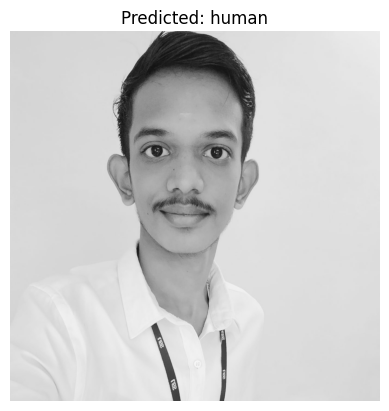

Probabilities:
cat -> 0.14
dog -> 0.43
horse -> 0.00
human -> 0.43




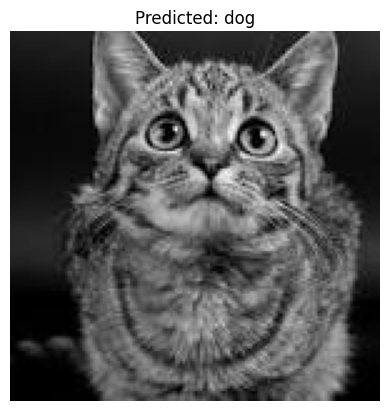

Probabilities:
cat -> 0.43
dog -> 0.57
horse -> 0.00
human -> 0.00




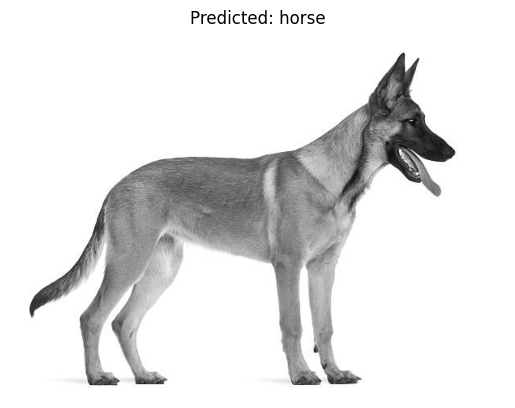

Probabilities:
cat -> 0.00
dog -> 0.00
horse -> 0.86
human -> 0.14




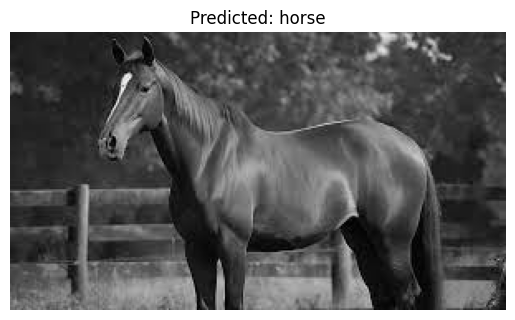

Probabilities:
cat -> 0.00
dog -> 0.42
horse -> 0.58
human -> 0.00




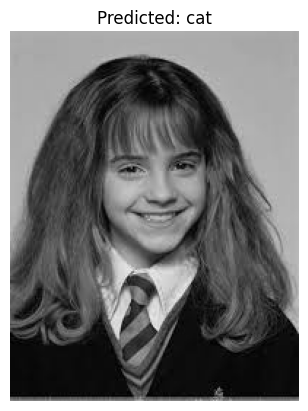

Probabilities:
cat -> 0.58
dog -> 0.42
horse -> 0.00
human -> 0.00




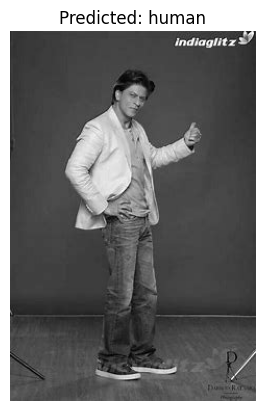

Probabilities:
cat -> 0.00
dog -> 0.00
horse -> 0.29
human -> 0.71




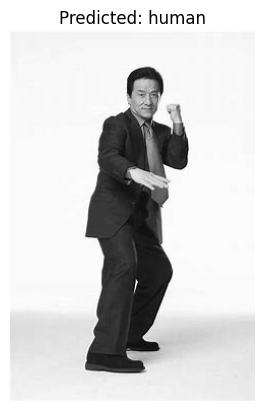

Probabilities:
cat -> 0.00
dog -> 0.00
horse -> 0.00
human -> 1.00




In [57]:
# Predicting images in a new directory
if 'best_knn' in locals():
    new_directory = "test"
    predict_images_in_directory(best_knn, new_directory)

---
### ***Conclusion***

In this project, we developed an object recognition system using K-Nearest Neighbors (KNN) and Histogram of Oriented Gradients (HOG) features to classify images into four categories: humans, cats, dogs, and horses. The process involved data preprocessing, feature extraction, model training, hyperparameter tuning, and evaluation. The resulting system demonstrated the practical use of KNN and HOG for object recognition, providing a solid foundation for further improvements and exploration in the field of computer vision.

---